In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as o
from sklearn import preprocessing
%matplotlib inline

In [7]:
# Importando os imóveis em bairros estritamente da Zona Sul
# Os dados abaixo são os adquiridos sem o Q1 da tabela original, considerando apenas bairros com total de imóveis 
# acima do Q1 não normalizado nem padronizado.

dfzn = pd.read_excel(r'C:\Users\GabrielMedina\Documents\_housiSP\tabela_zona_norte.xlsx')
display(dfzn)

,Unnamed: 0,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2,log_Aluguel,n_log_Aluguel,log_Aluguel_m2,n_log_Aluguel_m2
0,25,2472934101,Zap Imóveis,Santana,Zona Norte,São Paulo,Aluguel,1125,3172,4500,253,3,3,4,3,17.79,8.411833,0.353458,2.878637,-1.576358
1,53,2476331484,Zap Imóveis,Santana,Zona Norte,São Paulo,Aluguel,90,866,1950,96,3,1,2,3,20.31,7.575585,-0.782159,3.011113,-1.324413
2,120,2473448675,Zap Imóveis,Santana,Zona Norte,São Paulo,Aluguel,0,0,4000,60,2,0,0,2,66.67,8.294050,0.193510,4.199755,0.936153
3,123,2473616348,Zap Imóveis,Vila Santa Maria,Zona Norte,São Paulo,Aluguel,0,0,1100,50,2,0,0,1,22.00,7.003065,-1.559635,3.091042,-1.172403
4,136,2475117054,Zap Imóveis,Santana,Zona Norte,São Paulo,Aluguel,290,870,3000,126,4,1,2,2,23.81,8.006368,-0.197160,3.170106,-1.022040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9437,227160,2500601040,Zap Imóveis,Limão,Zona Norte,São Paulo,Aluguel,22,307,1500,58,2,0,1,1,25.86,7.313220,-1.138447,3.252697,-0.864967
9438,227168,2500612586,Zap Imóveis,Freguesia do Ó,Zona Norte,São Paulo,Aluguel,89,442,1200,77,2,0,1,1,15.58,7.090077,-1.441474,2.745988,-1.828630
9439,227179,2500619209,Zap Imóveis,Jardim das Laranjeiras,Zona Norte,São Paulo,Aluguel,0,700,1300,55,3,0,1,2,23.64,7.170120,-1.332777,3.162940,-1.035668
9440,227307,2457260249,Zap Imóveis,Santana,Zona Norte,São Paulo,Aluguel,0,1800,2000,60,1,1,1,1,33.33,7.600902,-0.747778,3.506458,-0.382364


In [8]:
dfzn = dfzn.drop(columns = ['Unnamed: 0'])
display(dfzn)

,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2,log_Aluguel,n_log_Aluguel,log_Aluguel_m2,n_log_Aluguel_m2
0,2472934101,Zap Imóveis,Santana,Zona Norte,São Paulo,Aluguel,1125,3172,4500,253,3,3,4,3,17.79,8.411833,0.353458,2.878637,-1.576358
1,2476331484,Zap Imóveis,Santana,Zona Norte,São Paulo,Aluguel,90,866,1950,96,3,1,2,3,20.31,7.575585,-0.782159,3.011113,-1.324413
2,2473448675,Zap Imóveis,Santana,Zona Norte,São Paulo,Aluguel,0,0,4000,60,2,0,0,2,66.67,8.294050,0.193510,4.199755,0.936153
3,2473616348,Zap Imóveis,Vila Santa Maria,Zona Norte,São Paulo,Aluguel,0,0,1100,50,2,0,0,1,22.00,7.003065,-1.559635,3.091042,-1.172403
4,2475117054,Zap Imóveis,Santana,Zona Norte,São Paulo,Aluguel,290,870,3000,126,4,1,2,2,23.81,8.006368,-0.197160,3.170106,-1.022040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9437,2500601040,Zap Imóveis,Limão,Zona Norte,São Paulo,Aluguel,22,307,1500,58,2,0,1,1,25.86,7.313220,-1.138447,3.252697,-0.864967
9438,2500612586,Zap Imóveis,Freguesia do Ó,Zona Norte,São Paulo,Aluguel,89,442,1200,77,2,0,1,1,15.58,7.090077,-1.441474,2.745988,-1.828630
9439,2500619209,Zap Imóveis,Jardim das Laranjeiras,Zona Norte,São Paulo,Aluguel,0,700,1300,55,3,0,1,2,23.64,7.170120,-1.332777,3.162940,-1.035668
9440,2457260249,Zap Imóveis,Santana,Zona Norte,São Paulo,Aluguel,0,1800,2000,60,1,1,1,1,33.33,7.600902,-0.747778,3.506458,-0.382364


In [9]:
datazn = dfzn.groupby(['Zona', 'Bairro']).Aluguel_m2.agg(['max', 'min', 'mean', 'std', 'size'])
display(datazn)

max    min       mean         std  \
Zona       Bairro                                                              
Zona Norte Barra Funda                   18.07  14.46  16.265000    2.084234   
           Carandiru                    400.00  10.00  38.088681   55.943149   
           Casa Verde                  1714.29   3.00  33.720404   83.398490   
           Casa Verde Média              35.00   8.33  24.033864    6.053554   
           Chora Menino                  71.43  14.50  27.340714   10.278180   
           Chácara Inglesa               29.13   5.29  16.862857    7.850335   
           Freguesia do Ó              1600.00   3.24  26.012002   48.006852   
           Imirim                      3947.37   3.18  46.281538  272.343535   
           Jardim Peri                   63.64   3.80  22.966477   11.929005   
           Jardim das Laranjeiras        81.67  11.11  26.395743   10.652864   
           Limao                         24.62  16.43  21.520000    3.976173   
           Limão                       2000.00   3.32  33.691810  117.543358   
           Parque Peruche                42.00  10.83  23.268955    6.701327   
           Santana                     4644.80   3.59  31.346386   77.043839   
           Sítio do Mandaqui             40.82   4.88  23.470625    8.000517   
           Tucuruvi                     138.89   5.88  26.904419   12.177196   
           Vila Albertina              5000.00   9.44  67.358727  474.672791   
           Vila Bianca                   34.29  25.00  29.544000    3.435255   
           Vila Guaca                    26.20  12.86  22.161667    4.921851   
           Vila Iório                    23.85  18.87  20.781667    1.780521   
           Vila Maria Alta               44.00   5.53  23.268435    6.246084   
           Vila Palmeiras              1200.00  10.00  32.056597  100.099757   
           Vila Santa Maria             820.00   9.43  32.121444   84.461219   
           Vila Siqueira (Zona Norte)    38.78  16.00  27.396750    5.121789   
           Água Fria                    238.10   3.89  26.680788   13.171563   

                                       size  
Zona       Bairro                            
Zona Norte Barra Funda                    4  
           Carandiru                     91  
           Casa Verde                  1188  
           Casa Verde Média              44  
           Chora Menino                  42  
           Chácara Inglesa                7  
           Freguesia do Ó              1119  
           Imirim                       208  
           Jardim Peri                   88  
           Jardim das Laranjeiras       101  
           Limao                          5  
           Limão                        442  
           Parque Peruche                67  
           Santana                     3752  
           Sítio do Mandaqui             48  
           Tucuruvi                     740  
           Vila Albertina               110  
           Vila Bianca                    5  
           Vila Guaca                     6  
           Vila Iório                     6  
           Vila Maria Alta              294  
           Vila Palmeiras               144  
           Vila Santa Maria              90  
           Vila Siqueira (Zona Norte)    80  
           Água Fria                    761

In [10]:
dfzn.isna().any().sum()

0

In [11]:
dfzn.dropna(inplace=True)
dfzn.isna().any().sum()

0

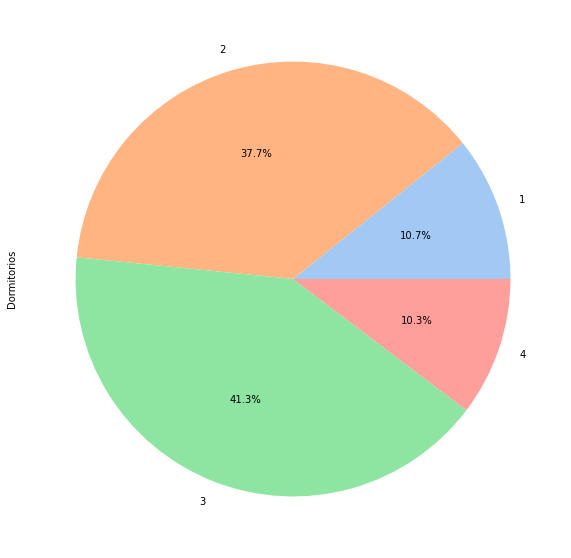

In [12]:
data = dfzn.groupby("Dormitorios")["Dormitorios"].sum()

colors = sns.color_palette('pastel')[0:5]

plt.figure(figsize=(10,10))
data.plot.pie(colors = colors, autopct='%.1f%%')
plt.show()

In [13]:
# Coletando a mediana e o Q3 da tabela zona sul

mediana = np.percentile(dfzn.Aluguel_m2, 50)
q3 = np.percentile(dfzn.Aluguel_m2, 75)
print(mediana)
print(q3)

25.0
31.71


In [14]:
# Separando os imóveis cujos aluguéis se encontram entre a mediana e o Q3

df___ = dfzn[(dfzn.Aluguel_m2 >= mediana) & (dfzn.Aluguel_m2 <= q3)]
print(df___)

       Id_Oferta       Portal            Bairro        Zona     Cidade  \
5     2477451218  Zap Imóveis    Parque Peruche  Zona Norte  São Paulo   
8     2479843419  Zap Imóveis             Limão  Zona Norte  São Paulo   
20    2473963294  Zap Imóveis             Limão  Zona Norte  São Paulo   
37    2474881253  Zap Imóveis           Santana  Zona Norte  São Paulo   
42    2475331649  Zap Imóveis  Vila Santa Maria  Zona Norte  São Paulo   
...          ...          ...               ...         ...        ...   
9414  2500426547  Zap Imóveis        Casa Verde  Zona Norte  São Paulo   
9415  2500426903  Zap Imóveis           Santana  Zona Norte  São Paulo   
9420  2500456581  Zap Imóveis           Santana  Zona Norte  São Paulo   
9429  2500541073  Zap Imóveis         Água Fria  Zona Norte  São Paulo   
9437  2500601040  Zap Imóveis             Limão  Zona Norte  São Paulo   

       Status  Valor_Iptu  Valor_Condominio  Valor_Aluguel  Area_Privativa  \
5     Aluguel         180        

In [15]:
# Transformando num dataframe legível

df_n = pd.DataFrame(data=df___)
display(df_n)

,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2,log_Aluguel,n_log_Aluguel,log_Aluguel_m2,n_log_Aluguel_m2
5,2477451218,Zap Imóveis,Parque Peruche,Zona Norte,São Paulo,Aluguel,180,0,2400,95,2,1,1,2,25.26,7.783224,-0.500187,3.229222,-0.909612
8,2479843419,Zap Imóveis,Limão,Zona Norte,São Paulo,Aluguel,105,450,1500,50,2,0,1,1,30.00,7.313220,-1.138447,3.401197,-0.582549
20,2473963294,Zap Imóveis,Limão,Zona Norte,São Paulo,Aluguel,270,760,2990,98,3,1,2,3,30.51,8.003029,-0.201694,3.418054,-0.550490
37,2474881253,Zap Imóveis,Santana,Zona Norte,São Paulo,Aluguel,64,1200,1200,42,1,0,0,1,28.57,7.090077,-1.441474,3.352357,-0.675433
42,2475331649,Zap Imóveis,Vila Santa Maria,Zona Norte,São Paulo,Aluguel,213,750,1900,66,2,1,2,2,28.79,7.549609,-0.817434,3.360028,-0.660845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9414,2500426547,Zap Imóveis,Casa Verde,Zona Norte,São Paulo,Aluguel,0,402,1200,48,2,0,1,1,25.00,7.090077,-1.441474,3.218876,-0.929289
9415,2500426903,Zap Imóveis,Santana,Zona Norte,São Paulo,Aluguel,47,0,869,33,1,0,0,1,26.33,6.767343,-1.879744,3.270709,-0.830712
9420,2500456581,Zap Imóveis,Santana,Zona Norte,São Paulo,Aluguel,426,823,3000,95,3,3,2,2,31.58,8.006368,-0.197160,3.452524,-0.484936
9429,2500541073,Zap Imóveis,Água Fria,Zona Norte,São Paulo,Aluguel,120,630,2184,76,3,1,0,2,28.74,7.688913,-0.628260,3.358290,-0.664151


In [40]:
#df_n.to_excel('C:/Users/GabrielMedina/Documents/_housiSP/med_q3_norte.xlsx')

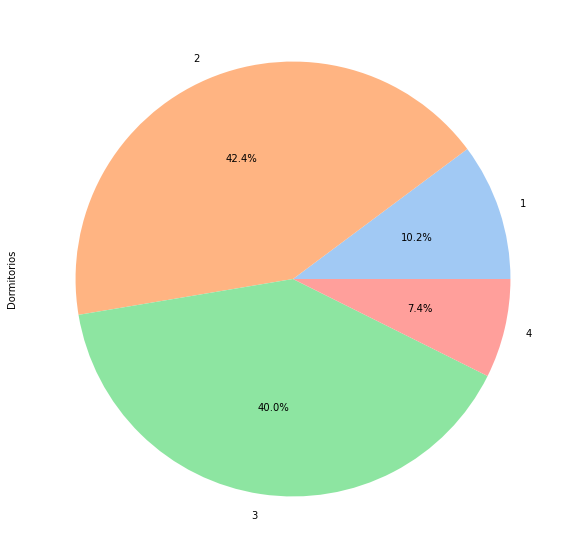

In [16]:
data = df_n.groupby("Dormitorios")["Dormitorios"].sum()

colors = sns.color_palette('pastel')[0:5]

plt.figure(figsize=(10,10))
data.plot.pie(colors = colors, autopct='%.1f%%')
plt.show()

In [17]:
# Agrupando as métricas básicas dos Bairros da zona sul

datatable1 = df_n.groupby(['Zona', 'Bairro']).Aluguel_m2.agg(['min', 'max', 'mean', 'std', 'size'])
display(datatable1)

min    max       mean       std  size
Zona       Bairro                                                             
Zona Norte Carandiru                   26.00  31.67  29.250476  1.899620    21
           Casa Verde                  25.00  31.67  27.774497  1.883863   318
           Casa Verde Média            25.00  30.23  27.991667  2.228685    18
           Chora Menino                25.01  31.25  27.416154  1.935306    13
           Chácara Inglesa             29.13  29.13  29.130000       NaN     1
           Freguesia do Ó              25.00  31.67  27.856667  1.952039   312
           Imirim                      25.00  31.58  27.770909  1.939732    77
           Jardim Peri                 25.00  31.58  28.114118  2.137010    17
           Jardim das Laranjeiras      25.00  31.63  27.412917  1.844935    24
           Limão                       25.00  31.67  28.006087  1.895345   138
           Parque Peruche              25.00  30.21  26.592857  1.509322    14
           Santana                     25.00  31.71  27.780743  2.032451   902
           Sítio do Mandaqui           25.00  31.67  28.175556  2.187793    18
           Tucuruvi                    25.00  31.67  27.542486  2.152115   177
           Vila Albertina              25.00  31.56  28.061364  1.763417    22
           Vila Bianca                 25.00  31.11  28.357500  2.519807     4
           Vila Guaca                  26.00  26.20  26.100000  0.141421     2
           Vila Maria Alta             25.00  31.58  27.280980  1.852826   102
           Vila Palmeiras              25.00  31.25  27.194500  1.920539    20
           Vila Santa Maria            25.00  31.25  27.966000  2.195252    25
           Vila Siqueira (Zona Norte)  25.00  31.37  27.559783  1.670452    46
           Água Fria                   25.00  31.71  28.901190  2.246357   210

In [18]:
# Tratando os NaN

datatable1.replace(np.nan, 0, inplace=True)
display(datatable1)

min    max       mean       std  size
Zona       Bairro                                                             
Zona Norte Carandiru                   26.00  31.67  29.250476  1.899620    21
           Casa Verde                  25.00  31.67  27.774497  1.883863   318
           Casa Verde Média            25.00  30.23  27.991667  2.228685    18
           Chora Menino                25.01  31.25  27.416154  1.935306    13
           Chácara Inglesa             29.13  29.13  29.130000  0.000000     1
           Freguesia do Ó              25.00  31.67  27.856667  1.952039   312
           Imirim                      25.00  31.58  27.770909  1.939732    77
           Jardim Peri                 25.00  31.58  28.114118  2.137010    17
           Jardim das Laranjeiras      25.00  31.63  27.412917  1.844935    24
           Limão                       25.00  31.67  28.006087  1.895345   138
           Parque Peruche              25.00  30.21  26.592857  1.509322    14
           Santana                     25.00  31.71  27.780743  2.032451   902
           Sítio do Mandaqui           25.00  31.67  28.175556  2.187793    18
           Tucuruvi                    25.00  31.67  27.542486  2.152115   177
           Vila Albertina              25.00  31.56  28.061364  1.763417    22
           Vila Bianca                 25.00  31.11  28.357500  2.519807     4
           Vila Guaca                  26.00  26.20  26.100000  0.141421     2
           Vila Maria Alta             25.00  31.58  27.280980  1.852826   102
           Vila Palmeiras              25.00  31.25  27.194500  1.920539    20
           Vila Santa Maria            25.00  31.25  27.966000  2.195252    25
           Vila Siqueira (Zona Norte)  25.00  31.37  27.559783  1.670452    46
           Água Fria                   25.00  31.71  28.901190  2.246357   210

In [19]:
data_pct = df_n.groupby('Dormitorios').agg(media =('Aluguel_m2', lambda p: p.mean())).round(2)
data_pct

,media
Dormitorios,
1,28.00
2,27.65
3,28.06
4,28.18


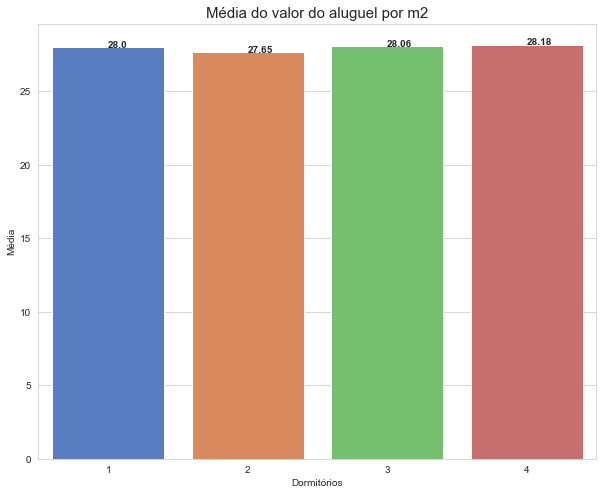

In [20]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(x=data_pct.index, y='media', data=data_pct, ci=None, palette="muted",orient='v', )
ax.set_title("Média do valor do aluguel por m2", fontsize=15)
ax.set_xlabel ("Dormitórios")
ax.set_ylabel ("Média")
# calculate the percentages and annotate the sns barplot
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),rect.get_height(), weight='bold' )


Aluguel por m2 na Zona Norte se mostra muito menor que em outras zonas

In [21]:
 # Agrupando as métricas de acordo com os bairros e número de quartos (considerados de 4 para baixo)


datatable2 = df_n.groupby(['Zona', 'Bairro', 'Dormitorios']).Aluguel_m2.agg(['min', 'max', 'mean', 'std', 'size'])
display(datatable2)

min    max       mean  \
Zona       Bairro                     Dormitorios                            
Zona Norte Carandiru                  1            26.00  31.67  29.727778   
                                      2            27.08  31.25  28.870000   
                                      3            26.03  31.25  28.130000   
                                      4            30.08  30.89  30.485000   
           Casa Verde                 1            25.00  31.58  27.946569   
...                                                  ...    ...        ...   
           Vila Siqueira (Zona Norte) 3            25.00  30.36  27.830000   
           Água Fria                  1            25.00  31.25  28.117586   
                                      2            25.00  31.67  27.704516   
                                      3            25.00  31.71  29.786903   
                                      4            25.95  31.25  28.373333   

                                                        std  size  
Zona       Bairro                     Dormitorios                  
Zona Norte Carandiru                  1            1.859602     9  
                                      2            1.828639     6  
                                      3            2.343046     4  
                                      4            0.572756     2  
           Casa Verde                 1            1.869239   102  
...                                                     ...   ...  
           Vila Siqueira (Zona Norte) 3            1.551718     8  
           Água Fria                  1            1.593650    29  
                                      2            1.975230    62  
                                      3            2.157243   113  
                                      4            2.341270     6  

[64 rows x 5 columns]

In [22]:
# Tratando os NaN

datatable2.replace(np.nan, 0, inplace=True)
display(datatable2)

min    max       mean  \
Zona       Bairro                     Dormitorios                            
Zona Norte Carandiru                  1            26.00  31.67  29.727778   
                                      2            27.08  31.25  28.870000   
                                      3            26.03  31.25  28.130000   
                                      4            30.08  30.89  30.485000   
           Casa Verde                 1            25.00  31.58  27.946569   
...                                                  ...    ...        ...   
           Vila Siqueira (Zona Norte) 3            25.00  30.36  27.830000   
           Água Fria                  1            25.00  31.25  28.117586   
                                      2            25.00  31.67  27.704516   
                                      3            25.00  31.71  29.786903   
                                      4            25.95  31.25  28.373333   

                                                        std  size  
Zona       Bairro                     Dormitorios                  
Zona Norte Carandiru                  1            1.859602     9  
                                      2            1.828639     6  
                                      3            2.343046     4  
                                      4            0.572756     2  
           Casa Verde                 1            1.869239   102  
...                                                     ...   ...  
           Vila Siqueira (Zona Norte) 3            1.551718     8  
           Água Fria                  1            1.593650    29  
                                      2            1.975230    62  
                                      3            2.157243   113  
                                      4            2.341270     6  

[64 rows x 5 columns]

<AxesSubplot:ylabel='Frequency'>

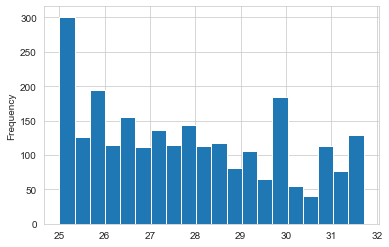

In [23]:
# Visualizando um Histograma simples

df_n['Aluguel_m2'].plot.hist(bins=20)

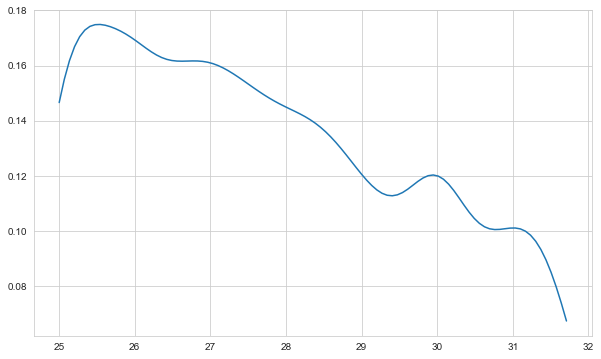

In [24]:
from scipy.stats.kde import gaussian_kde
from numpy import linspace

plt.figure(figsize=(10,6))
# estabelecendo os dados
data = df_n['Aluguel_m2']
# Criando o kernel a fim de estimar a probabilidade sobre os valores da array
kde = gaussian_kde(data)
# Valores sobre os quais o kernel será avaliado
dist_space = linspace(min(data), max(data), 100)
# plot da curva kde
plt.plot(dist_space, kde(dist_space))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'Parque Peruche'),
  Text(1, 0, 'Limão'),
  Text(2, 0, 'Santana'),
  Text(3, 0, 'Vila Santa Maria'),
  Text(4, 0, 'Casa Verde'),
  Text(5, 0, 'Freguesia do Ó'),
  Text(6, 0, 'Água Fria'),
  Text(7, 0, 'Vila Siqueira (Zona Norte)'),
  Text(8, 0, 'Casa Verde Média'),
  Text(9, 0, 'Jardim Peri'),
  Text(10, 0, 'Imirim'),
  Text(11, 0, 'Jardim das Laranjeiras'),
  Text(12, 0, 'Vila Palmeiras'),
  Text(13, 0, 'Vila Bianca'),
  Text(14, 0, 'Chora Menino'),
  Text(15, 0, 'Sítio do Mandaqui'),
  Text(16, 0, 'Carandiru'),
  Text(17, 0, 'Tucuruvi'),
  Text(18, 0, 'Vila Guaca'),
  Text(19, 0, 'Vila Albertina'),
  Text(20, 0, 'Chácara Inglesa'),
  Text(21, 0, 'Vila Maria Alta')])

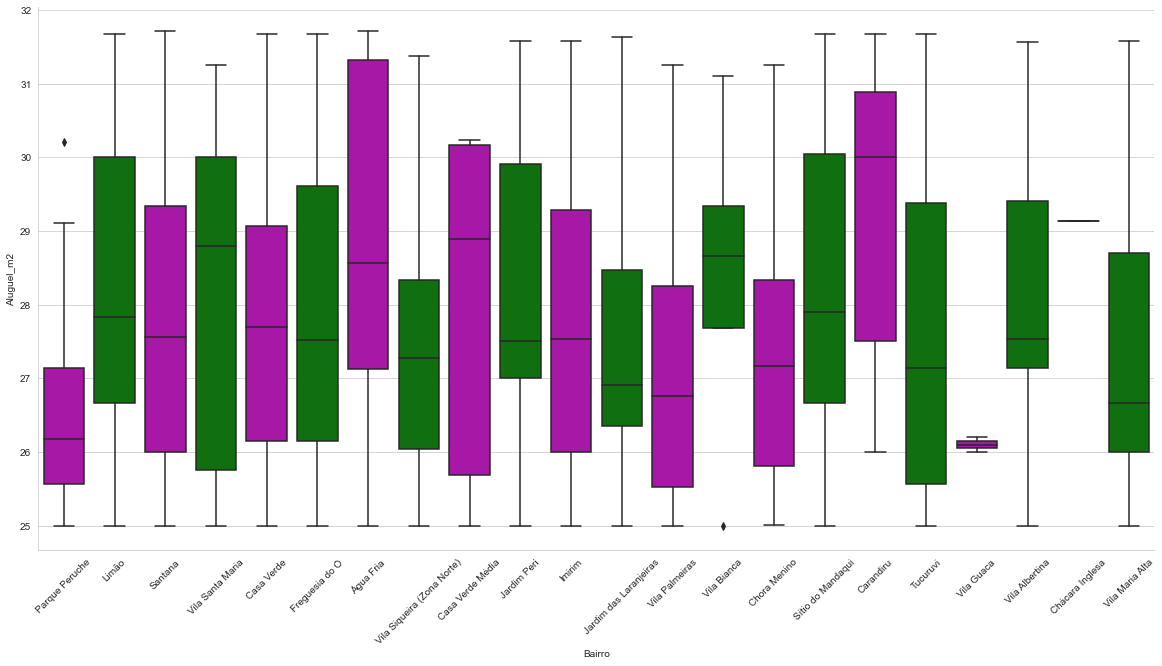

In [25]:
# Boxplot com os bairros e o algugeul por m2


plt.figure(figsize=(20,10))

sns.boxplot(x="Bairro", y="Aluguel_m2", palette=["m", "g"],
            data=df_n)
sns.despine()
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'Parque Peruche'),
  Text(1, 0, 'Limão'),
  Text(2, 0, 'Santana'),
  Text(3, 0, 'Vila Santa Maria'),
  Text(4, 0, 'Casa Verde'),
  Text(5, 0, 'Freguesia do Ó'),
  Text(6, 0, 'Água Fria'),
  Text(7, 0, 'Vila Siqueira (Zona Norte)'),
  Text(8, 0, 'Casa Verde Média'),
  Text(9, 0, 'Jardim Peri'),
  Text(10, 0, 'Imirim'),
  Text(11, 0, 'Jardim das Laranjeiras'),
  Text(12, 0, 'Vila Palmeiras'),
  Text(13, 0, 'Vila Bianca'),
  Text(14, 0, 'Chora Menino'),
  Text(15, 0, 'Sítio do Mandaqui'),
  Text(16, 0, 'Carandiru'),
  Text(17, 0, 'Tucuruvi'),
  Text(18, 0, 'Vila Guaca'),
  Text(19, 0, 'Vila Albertina'),
  Text(20, 0, 'Chácara Inglesa'),
  Text(21, 0, 'Vila Maria Alta')])

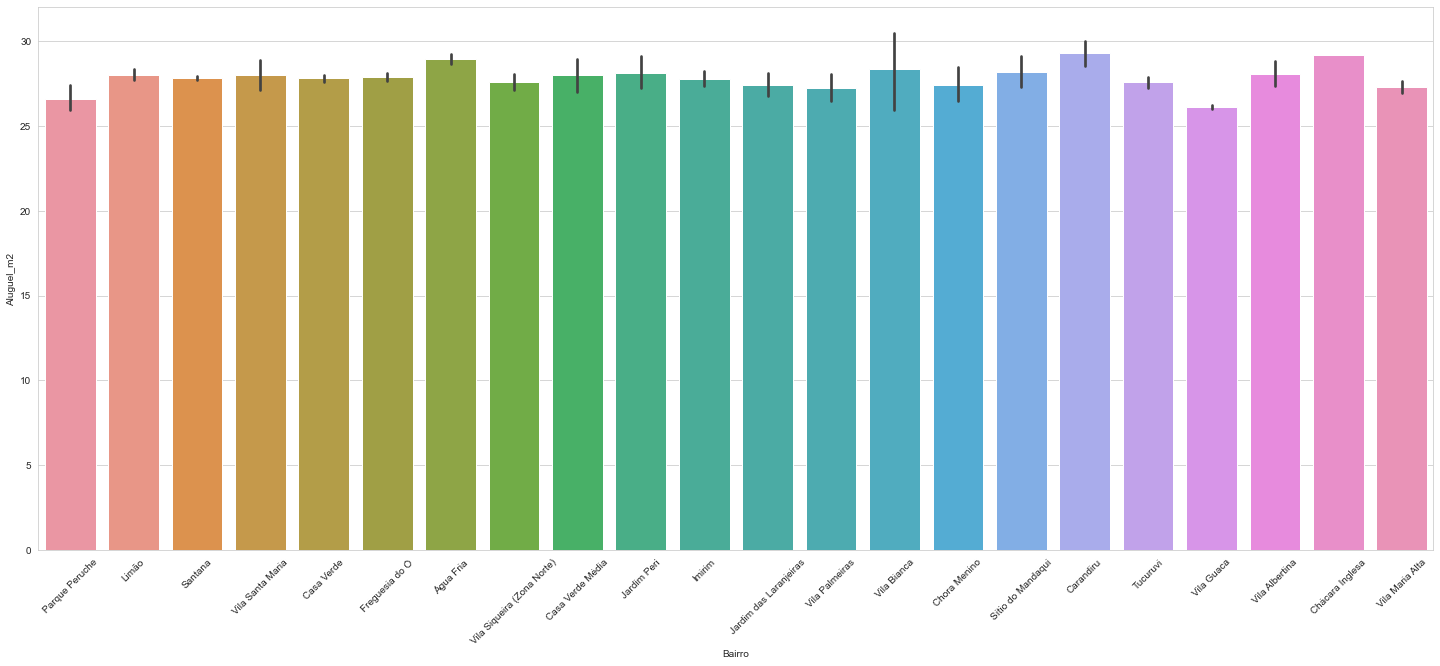

In [26]:
plt.figure(figsize=(25,10))
sns.barplot(x = df_n['Bairro'], y = df_n['Aluguel_m2'])
plt.xticks(rotation=45)

#    
#    
### Padronizando os valores para Log

In [27]:
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:ylabel='Frequency'>

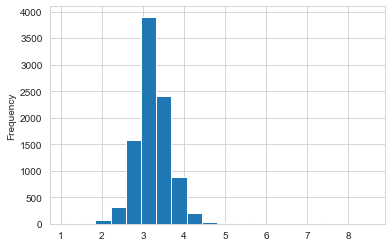

In [28]:
dfzn['log_Aluguel_m2'] = np.log(dfzn['Aluguel_m2'])
dfzn['log_Aluguel_m2'].plot.hist(bins=20)

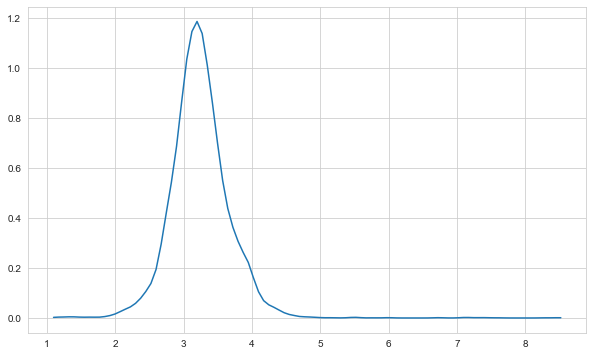

In [29]:
from scipy.stats.kde import gaussian_kde
from numpy import linspace

plt.figure(figsize=(10,6))
# estabelecendo os dados
data = dfzn['log_Aluguel_m2']
# Criando o kernel a fim de estimar a probabilidade sobre os valores da array
kde = gaussian_kde(data)
# Valores sobre os quais o kernel será avaliado
dist_space = linspace(min(data), max(data), 100)
# plot da curva kde
plt.plot(dist_space, kde(dist_space))

In [30]:
# definindo os dados
x_zn = dfzn['log_Aluguel_m2']
# calculando a média 
mu_zn = np.mean(x_zn)
# calculando o desvio=padrão (utilizando o padrão para o Python)
std_zn = np.std(x_zn)
print('Média Zona Sul: {}'.format(mu_zn))
print('Desvio Padrão Zona Sul: {}'.format(std_zn))

Média Zona Sul: 3.2411042755855326
Desvio Padrão Zona Sul: 0.4396559906085694


In [31]:
# Coletando a mediana e o Q3 da tabela zona sul

medianalog = np.percentile(dfzn.log_Aluguel_m2, 50)
q3log = np.percentile(dfzn.log_Aluguel_m2, 75)
print(medianalog)
print(q3log)

3.2188758248682006
3.456632088550256


In [32]:
df_log = dfzn[(dfzn.log_Aluguel_m2 >= medianalog) & (dfzn.log_Aluguel_m2 <= q3log)]
print(df_log)

       Id_Oferta       Portal            Bairro        Zona     Cidade  \
5     2477451218  Zap Imóveis    Parque Peruche  Zona Norte  São Paulo   
8     2479843419  Zap Imóveis             Limão  Zona Norte  São Paulo   
20    2473963294  Zap Imóveis             Limão  Zona Norte  São Paulo   
37    2474881253  Zap Imóveis           Santana  Zona Norte  São Paulo   
42    2475331649  Zap Imóveis  Vila Santa Maria  Zona Norte  São Paulo   
...          ...          ...               ...         ...        ...   
9414  2500426547  Zap Imóveis        Casa Verde  Zona Norte  São Paulo   
9415  2500426903  Zap Imóveis           Santana  Zona Norte  São Paulo   
9420  2500456581  Zap Imóveis           Santana  Zona Norte  São Paulo   
9429  2500541073  Zap Imóveis         Água Fria  Zona Norte  São Paulo   
9437  2500601040  Zap Imóveis             Limão  Zona Norte  São Paulo   

       Status  Valor_Iptu  Valor_Condominio  Valor_Aluguel  Area_Privativa  \
5     Aluguel         180        

In [33]:
df_nlog = pd.DataFrame(data=df_log)
display(df_nlog)

,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2,log_Aluguel,n_log_Aluguel,log_Aluguel_m2,n_log_Aluguel_m2
5,2477451218,Zap Imóveis,Parque Peruche,Zona Norte,São Paulo,Aluguel,180,0,2400,95,2,1,1,2,25.26,7.783224,-0.500187,3.229222,-0.909612
8,2479843419,Zap Imóveis,Limão,Zona Norte,São Paulo,Aluguel,105,450,1500,50,2,0,1,1,30.00,7.313220,-1.138447,3.401197,-0.582549
20,2473963294,Zap Imóveis,Limão,Zona Norte,São Paulo,Aluguel,270,760,2990,98,3,1,2,3,30.51,8.003029,-0.201694,3.418054,-0.550490
37,2474881253,Zap Imóveis,Santana,Zona Norte,São Paulo,Aluguel,64,1200,1200,42,1,0,0,1,28.57,7.090077,-1.441474,3.352357,-0.675433
42,2475331649,Zap Imóveis,Vila Santa Maria,Zona Norte,São Paulo,Aluguel,213,750,1900,66,2,1,2,2,28.79,7.549609,-0.817434,3.360028,-0.660845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9414,2500426547,Zap Imóveis,Casa Verde,Zona Norte,São Paulo,Aluguel,0,402,1200,48,2,0,1,1,25.00,7.090077,-1.441474,3.218876,-0.929289
9415,2500426903,Zap Imóveis,Santana,Zona Norte,São Paulo,Aluguel,47,0,869,33,1,0,0,1,26.33,6.767343,-1.879744,3.270709,-0.830712
9420,2500456581,Zap Imóveis,Santana,Zona Norte,São Paulo,Aluguel,426,823,3000,95,3,3,2,2,31.58,8.006368,-0.197160,3.452524,-0.484936
9429,2500541073,Zap Imóveis,Água Fria,Zona Norte,São Paulo,Aluguel,120,630,2184,76,3,1,0,2,28.74,7.688913,-0.628260,3.358290,-0.664151


In [34]:
# Agrupando as métricas básicas da tabela padronizada dos Bairros da zona sul para aluguel/m2

datatablelog1 = df_nlog.groupby(['Zona', 'Bairro']).Aluguel_m2.agg(['min', 'max', 'mean', 'std', 'size'])
display(datatablelog1)

min    max       mean       std  size
Zona       Bairro                                                             
Zona Norte Carandiru                   26.00  31.67  29.250476  1.899620    21
           Casa Verde                  25.00  31.67  27.774497  1.883863   318
           Casa Verde Média            25.00  30.23  27.991667  2.228685    18
           Chora Menino                25.01  31.25  27.416154  1.935306    13
           Chácara Inglesa             29.13  29.13  29.130000       NaN     1
           Freguesia do Ó              25.00  31.67  27.856667  1.952039   312
           Imirim                      25.00  31.58  27.770909  1.939732    77
           Jardim Peri                 25.00  31.58  28.114118  2.137010    17
           Jardim das Laranjeiras      25.00  31.63  27.412917  1.844935    24
           Limão                       25.00  31.67  28.006087  1.895345   138
           Parque Peruche              25.00  30.21  26.592857  1.509322    14
           Santana                     25.00  31.71  27.780743  2.032451   902
           Sítio do Mandaqui           25.00  31.67  28.175556  2.187793    18
           Tucuruvi                    25.00  31.67  27.542486  2.152115   177
           Vila Albertina              25.00  31.56  28.061364  1.763417    22
           Vila Bianca                 25.00  31.11  28.357500  2.519807     4
           Vila Guaca                  26.00  26.20  26.100000  0.141421     2
           Vila Maria Alta             25.00  31.58  27.280980  1.852826   102
           Vila Palmeiras              25.00  31.25  27.194500  1.920539    20
           Vila Santa Maria            25.00  31.25  27.966000  2.195252    25
           Vila Siqueira (Zona Norte)  25.00  31.37  27.559783  1.670452    46
           Água Fria                   25.00  31.71  28.901190  2.246357   210

In [35]:
# Tratando os NaN

datatablelog1.replace(np.nan, 0, inplace=True)
display(datatablelog1)

min    max       mean       std  size
Zona       Bairro                                                             
Zona Norte Carandiru                   26.00  31.67  29.250476  1.899620    21
           Casa Verde                  25.00  31.67  27.774497  1.883863   318
           Casa Verde Média            25.00  30.23  27.991667  2.228685    18
           Chora Menino                25.01  31.25  27.416154  1.935306    13
           Chácara Inglesa             29.13  29.13  29.130000  0.000000     1
           Freguesia do Ó              25.00  31.67  27.856667  1.952039   312
           Imirim                      25.00  31.58  27.770909  1.939732    77
           Jardim Peri                 25.00  31.58  28.114118  2.137010    17
           Jardim das Laranjeiras      25.00  31.63  27.412917  1.844935    24
           Limão                       25.00  31.67  28.006087  1.895345   138
           Parque Peruche              25.00  30.21  26.592857  1.509322    14
           Santana                     25.00  31.71  27.780743  2.032451   902
           Sítio do Mandaqui           25.00  31.67  28.175556  2.187793    18
           Tucuruvi                    25.00  31.67  27.542486  2.152115   177
           Vila Albertina              25.00  31.56  28.061364  1.763417    22
           Vila Bianca                 25.00  31.11  28.357500  2.519807     4
           Vila Guaca                  26.00  26.20  26.100000  0.141421     2
           Vila Maria Alta             25.00  31.58  27.280980  1.852826   102
           Vila Palmeiras              25.00  31.25  27.194500  1.920539    20
           Vila Santa Maria            25.00  31.25  27.966000  2.195252    25
           Vila Siqueira (Zona Norte)  25.00  31.37  27.559783  1.670452    46
           Água Fria                   25.00  31.71  28.901190  2.246357   210

In [36]:
# Agrupando as métricas de acordo com os bairros e número de quartos (considerados de 4 para baixo)


datatablelog2 = df_nlog.groupby(['Zona', 'Bairro', 'Dormitorios']).Aluguel_m2.agg(['min', 'max', 'mean', 'std', 'size'])
display(datatablelog2)

min    max       mean  \
Zona       Bairro                     Dormitorios                            
Zona Norte Carandiru                  1            26.00  31.67  29.727778   
                                      2            27.08  31.25  28.870000   
                                      3            26.03  31.25  28.130000   
                                      4            30.08  30.89  30.485000   
           Casa Verde                 1            25.00  31.58  27.946569   
...                                                  ...    ...        ...   
           Vila Siqueira (Zona Norte) 3            25.00  30.36  27.830000   
           Água Fria                  1            25.00  31.25  28.117586   
                                      2            25.00  31.67  27.704516   
                                      3            25.00  31.71  29.786903   
                                      4            25.95  31.25  28.373333   

                                                        std  size  
Zona       Bairro                     Dormitorios                  
Zona Norte Carandiru                  1            1.859602     9  
                                      2            1.828639     6  
                                      3            2.343046     4  
                                      4            0.572756     2  
           Casa Verde                 1            1.869239   102  
...                                                     ...   ...  
           Vila Siqueira (Zona Norte) 3            1.551718     8  
           Água Fria                  1            1.593650    29  
                                      2            1.975230    62  
                                      3            2.157243   113  
                                      4            2.341270     6  

[64 rows x 5 columns]

In [37]:
datatablelog2.replace(np.nan, 0, inplace=True)
display(datatablelog2)

min    max       mean  \
Zona       Bairro                     Dormitorios                            
Zona Norte Carandiru                  1            26.00  31.67  29.727778   
                                      2            27.08  31.25  28.870000   
                                      3            26.03  31.25  28.130000   
                                      4            30.08  30.89  30.485000   
           Casa Verde                 1            25.00  31.58  27.946569   
...                                                  ...    ...        ...   
           Vila Siqueira (Zona Norte) 3            25.00  30.36  27.830000   
           Água Fria                  1            25.00  31.25  28.117586   
                                      2            25.00  31.67  27.704516   
                                      3            25.00  31.71  29.786903   
                                      4            25.95  31.25  28.373333   

                                                        std  size  
Zona       Bairro                     Dormitorios                  
Zona Norte Carandiru                  1            1.859602     9  
                                      2            1.828639     6  
                                      3            2.343046     4  
                                      4            0.572756     2  
           Casa Verde                 1            1.869239   102  
...                                                     ...   ...  
           Vila Siqueira (Zona Norte) 3            1.551718     8  
           Água Fria                  1            1.593650    29  
                                      2            1.975230    62  
                                      3            2.157243   113  
                                      4            2.341270     6  

[64 rows x 5 columns]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

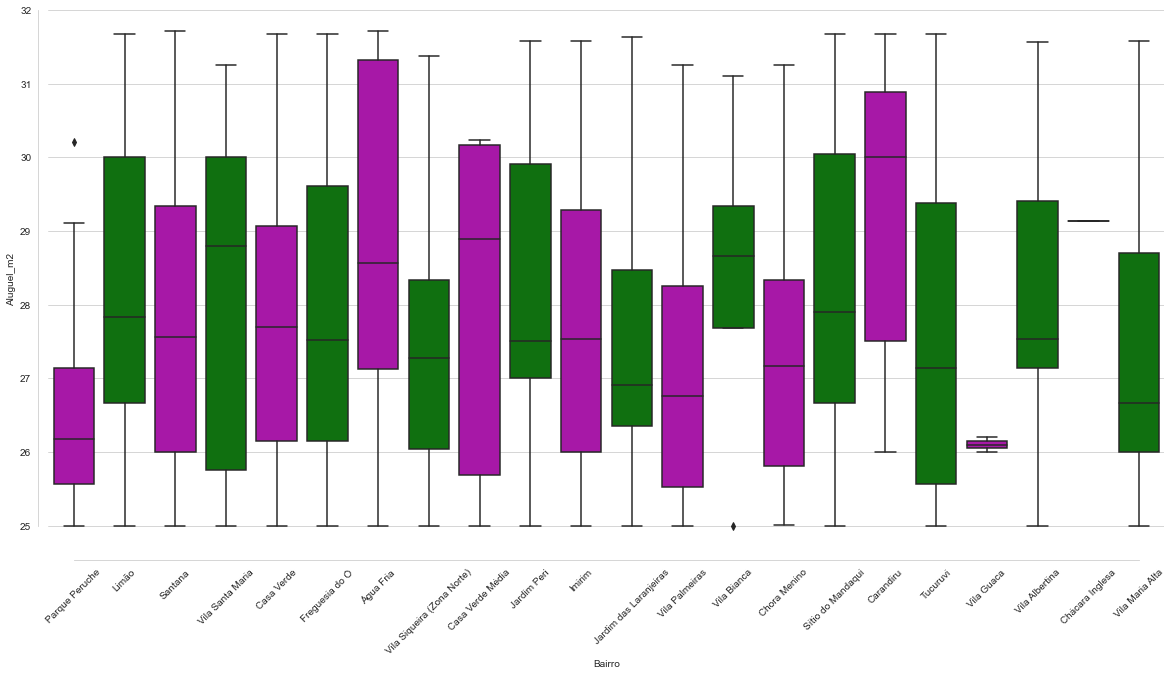

In [38]:
# Boxplot com os bairros e o algugeul por m2


plt.figure(figsize=(20,10))

sns.boxplot(x="Bairro", y="Aluguel_m2", palette=["m", "g"],
            data=df_nlog)
sns.despine(offset=10, trim=True)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'Parque Peruche'),
  Text(1, 0, 'Limão'),
  Text(2, 0, 'Santana'),
  Text(3, 0, 'Vila Santa Maria'),
  Text(4, 0, 'Casa Verde'),
  Text(5, 0, 'Freguesia do Ó'),
  Text(6, 0, 'Água Fria'),
  Text(7, 0, 'Vila Siqueira (Zona Norte)'),
  Text(8, 0, 'Casa Verde Média'),
  Text(9, 0, 'Jardim Peri'),
  Text(10, 0, 'Imirim'),
  Text(11, 0, 'Jardim das Laranjeiras'),
  Text(12, 0, 'Vila Palmeiras'),
  Text(13, 0, 'Vila Bianca'),
  Text(14, 0, 'Chora Menino'),
  Text(15, 0, 'Sítio do Mandaqui'),
  Text(16, 0, 'Carandiru'),
  Text(17, 0, 'Tucuruvi'),
  Text(18, 0, 'Vila Guaca'),
  Text(19, 0, 'Vila Albertina'),
  Text(20, 0, 'Chácara Inglesa'),
  Text(21, 0, 'Vila Maria Alta')])

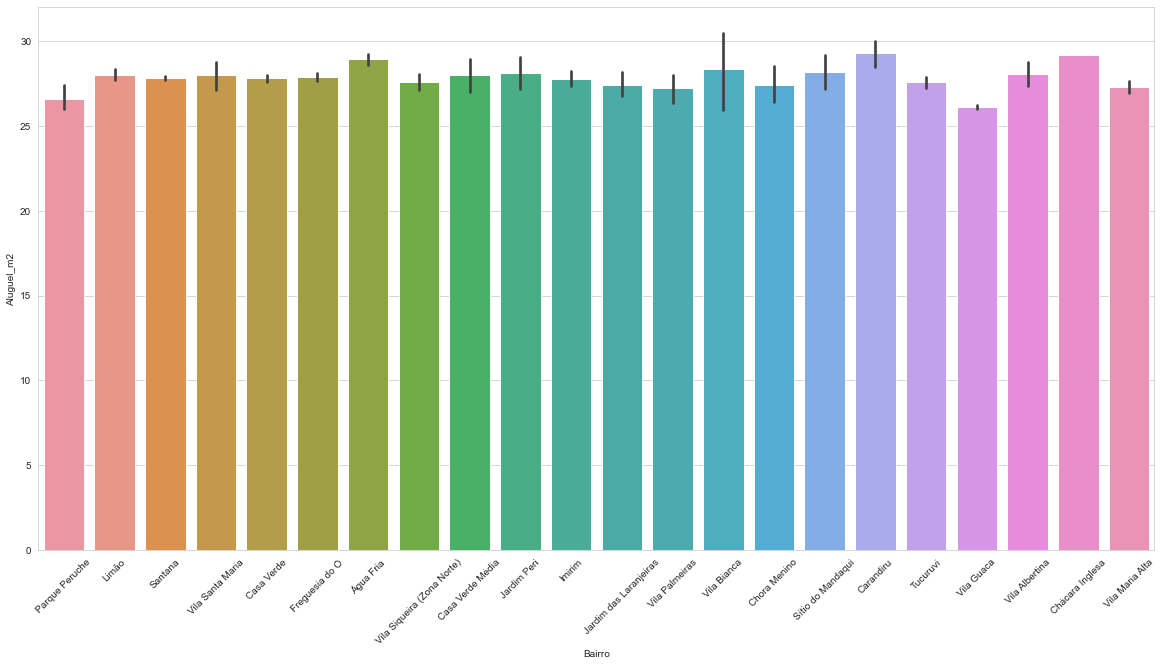

In [39]:
plt.figure(figsize=(20,10))
sns.barplot(x = df_nlog['Bairro'], y = df_nlog['Aluguel_m2'])
plt.xticks(rotation=45)